<a href="https://colab.research.google.com/github/kuxx12257/deep_learning_cookbook/blob/main/convolution_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

h=[2,1,0]
x=[3,4,5]

y=np.convolve(x,h)
print(y)

[ 6 11 14  5  0]


In [4]:
x=[6,2]
h=[1,2,5,4]

y=np.convolve(x,h,"full")#applied padding hence we get 2 extra values when
print(y)

[ 6 14 34 34  8]


In [7]:
x=[6,2]
h=[1,2,5,4]

y=np.convolve(x,h,"same")#applying padding only on the left side
print(y)

[ 6 14 34 34]


In [9]:
#no padding
x=[6,2]
h=[1,2,5,4]

y=np.convolve(x,h,'valid')
print(y)

[14 34 34]


In [12]:
from scipy import signal as sg
I=[[1,2,3],[2,3,4],[3,4,5]]
g=[[-1,1]]

print(sg.convolve(I,g,mode="full"))
print(sg.convolve(I,g,mode="valid"))
print(sg.convolve(I,g,mode="same"))

[[-1 -1 -1  3]
 [-2 -1 -1  4]
 [-3 -1 -1  5]]
[[-1 -1]
 [-1 -1]
 [-1 -1]]
[[-1 -1 -1]
 [-2 -1 -1]
 [-3 -1 -1]]


In [13]:
import tensorflow as tf
from IPython.display import Markdown, display

def printmd(string):
    display(Markdown('# <span style="color:red">'+string+'</span>'))

In [17]:
input=tf.Variable(tf.random.normal([1,10,10,1]))
filter=tf.Variable(tf.random.normal([3,3,1,1]))

op=tf.nn.conv2d(input,filter,strides=[1,1,1,1],padding="VALID")
op2=tf.nn.conv2d(input,filter,strides=[1,1,1,1],padding="SAME")

print(input.numpy())
print(filter.numpy())
print(op.numpy())
print(op2.numpy())

[[[[-0.6707971 ]
   [ 0.20631348]
   [ 0.5206905 ]
   [ 1.1080302 ]
   [-0.474817  ]
   [ 0.8947357 ]
   [ 0.16781698]
   [-0.529743  ]
   [ 0.86901605]
   [ 1.613587  ]]

  [[ 0.8973349 ]
   [-0.15571344]
   [ 0.6581699 ]
   [-0.43185264]
   [ 0.08294386]
   [ 0.1605689 ]
   [ 0.35804275]
   [-0.34712917]
   [ 0.16773057]
   [ 0.977817  ]]

  [[ 1.541409  ]
   [-2.6148071 ]
   [ 0.86228585]
   [ 0.15436356]
   [ 2.4583683 ]
   [-0.12000974]
   [ 0.3899554 ]
   [-0.14674903]
   [-0.31456146]
   [ 1.0029519 ]]

  [[ 0.8000874 ]
   [ 1.2623316 ]
   [ 2.0523477 ]
   [-1.4077728 ]
   [ 0.5782804 ]
   [ 1.6184094 ]
   [-1.6452893 ]
   [ 1.3790433 ]
   [ 0.14296393]
   [-1.0293198 ]]

  [[-0.60503083]
   [-0.02865889]
   [ 0.97812957]
   [ 0.7861571 ]
   [ 1.2489991 ]
   [-1.5852993 ]
   [ 2.1450806 ]
   [ 0.88162684]
   [-2.0131419 ]
   [-1.2810589 ]]

  [[ 0.5944397 ]
   [-0.50539047]
   [-0.22490612]
   [-0.47393134]
   [-0.26099977]
   [-1.4496669 ]
   [ 0.7023012 ]
   [ 0.18735397]
   [

WORKING WITH REAL IMAGES


In [22]:
# for workin with images
!wget --quiet https://ibm.box.com/shared/static/cn7yt7z10j8rx6um1v9seagpgmzzxnlz.jpg --output-document bird.jpg

In [23]:
import numpy as np
from scipy import signal
from scipy import misc
import matplotlib.pyplot as plt
from PIL import Image

In [24]:
im=Image.open("bird.jpg")
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1920x1440 at 0x7F3E02DE2030>


In [26]:
image_gr=im.convert('L')#used to convert the image from colored to greyscale
print(image_gr)

<PIL.Image.Image image mode=L size=1920x1440 at 0x7F3E02DE3BC0>


In [27]:
arr=np.asarray(image_gr) #converts the image to an array form
print(arr)

[[ 64  71  65 ...  49  47  48]
 [ 68  71  64 ...  54  52  51]
 [ 65  69  66 ...  54  50  55]
 ...
 [ 22  23  23 ... 184 170 155]
 [ 18  21  26 ... 179 166 153]
 [ 27  22  21 ... 170 159 149]]


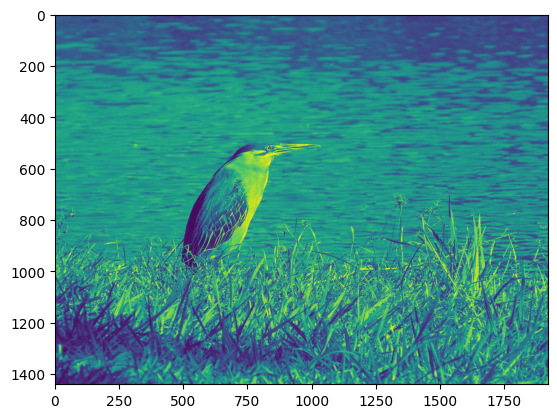

In [28]:
imgplot=plt.imshow(arr)#plotting the image

In [31]:
imgplot.set_cmap('gray')#converting the imageto grayscale and then displaying it
plt.show(imgplot)

In [32]:
kernel = np.array([[ 0, 1, 0],
                   [ 1,-4, 1],
                   [ 0, 1, 0],]) #defining the kernel or the filter

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
#convolving the image with kernel to obtain grad which is the concvolved matrix

GRADIENT MAGNITUDE - Feature map


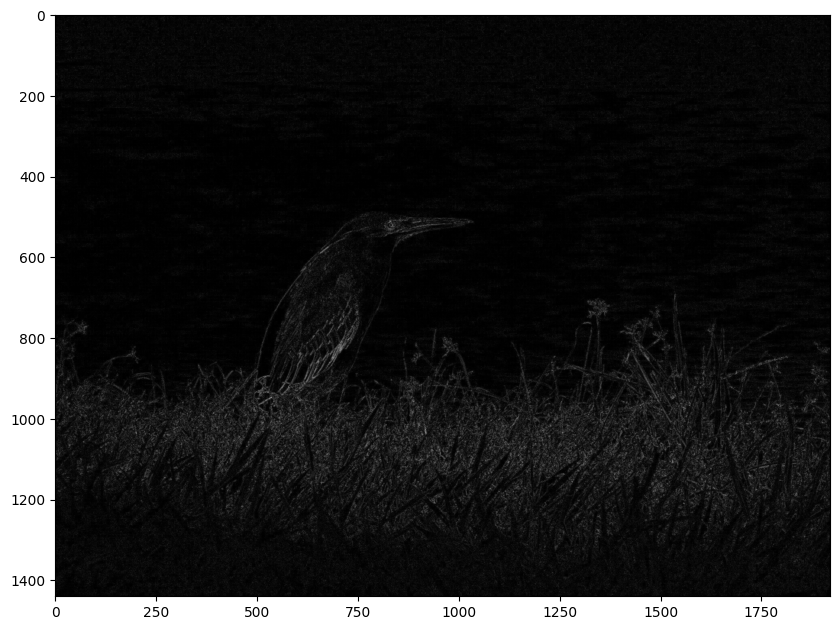

In [33]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))#plotting the convolved image

aux.imshow(np.absolute(grad), cmap='gray')


In [37]:
#performomg the normalisation on the image pixels
#after normalisation of the image it becomes easier to detect the details

grad_biases=np.absolute(grad)+100
grad_biases[grad_biases>255]=255

GRADIENT MAGNITUDE - Feature map


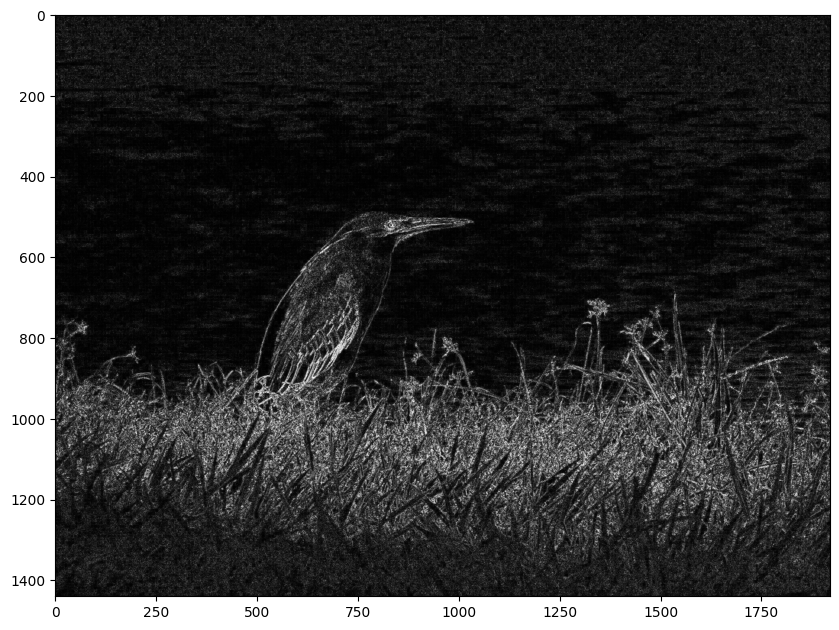

In [38]:
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad_biases), cmap='gray')

In [39]:
# download standard image
!wget --quiet https://ibm.box.com/shared/static/vvm1b63uvuxq88vbw9znpwu5ol380mco.jpg --output-document num3.jpg


 Original type: <PIL.Image.Image image mode=L size=181x181 at 0x7F3DE83EBD70> 


After conversion to numerical representation: 

 array([[26, 14, 12, ..., 11, 11, 11],
       [ 0,  0,  1, ...,  0,  0,  0],
       [12,  1,  0, ...,  0,  0,  0],
       ...,
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0],
       [12,  0,  0, ...,  0,  0,  0]], dtype=uint8)

 Input image converted to gray scale: 



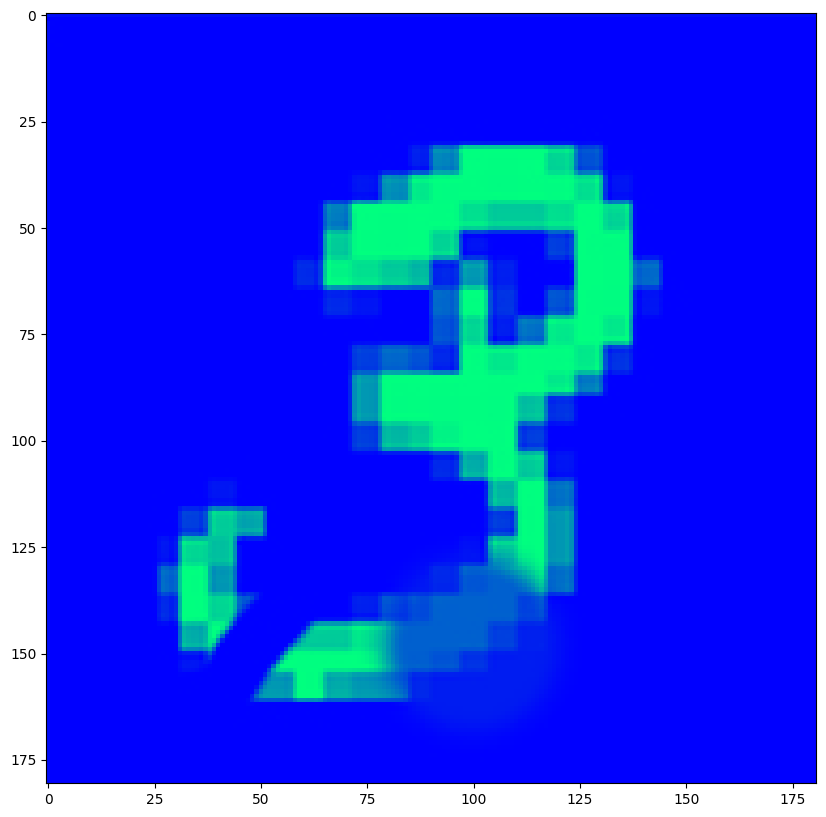

In [42]:
im = Image.open('num3.jpg')  # type here your image's name

image_gr = im.convert("L")    # convert("L") translate color images into black and white
                              # uses the ITU-R 601-2 Luma transform (there are several
                              # ways to convert an image to grey scale)
print("\n Original type: %r \n\n" % image_gr)

# convert image to a matrix with values from 0 to 255 (uint8)
arr = np.asarray(image_gr)
print("After conversion to numerical representation: \n\n %r" % arr)

%matplotlib inline

### Plot image
fig, aux = plt.subplots(figsize=(10, 10))
imgplot = plt.imshow(arr)
imgplot.set_cmap('winter')  #you can experiment different colormaps (Greys,winter,autumn)
print("\n Input image converted to gray scale: \n")
plt.show(imgplot)

GRADIENT MAGNITUDE - Feature map


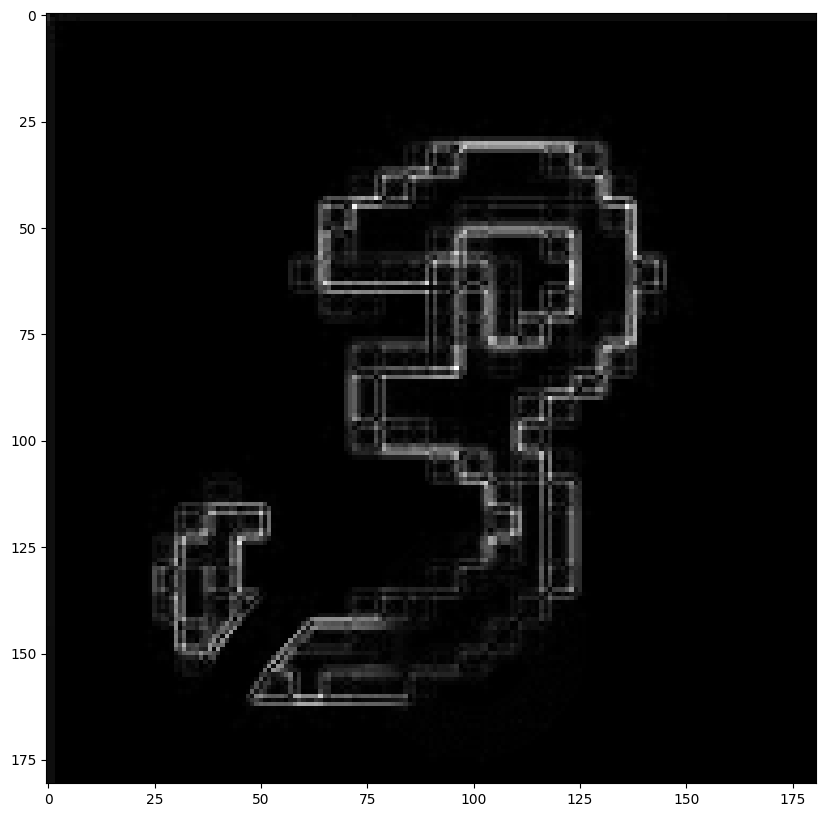

In [43]:
kernel = np.array([
                        [ 0, 1, 0],
                        [ 1,-4, 1],
                        [ 0, 1, 0],
                                     ])

grad = signal.convolve2d(arr, kernel, mode='same', boundary='symm')
%matplotlib inline

print('GRADIENT MAGNITUDE - Feature map')

fig, aux = plt.subplots(figsize=(10, 10))
aux.imshow(np.absolute(grad), cmap='gray')
